
# Medical Insurance Cost Predictor

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set()

## Data Collection and Analysis

In [2]:
# * Load the data
insurance_dataset = pd.read_csv('insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_dataset.shape

(1338, 7)

In [4]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categorical Features:
- Gender(sex)
- Smoker
- Region

In [5]:
#  Check for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [6]:
# Statistical Measures
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


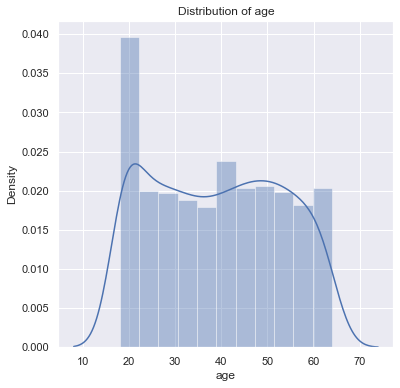

In [7]:
# Distribution of age value
plt.figure(figsize=(6, 6))
sns.distplot(insurance_dataset['age'])
plt.title('Distribution of age')
plt.show()

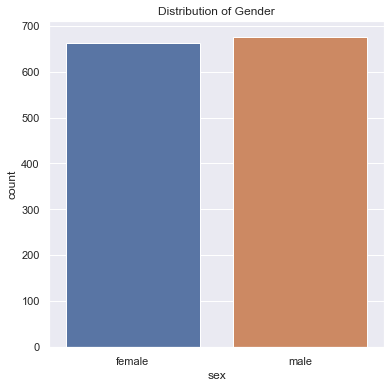

In [8]:
# Gender colums
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Distribution of Gender')
plt.show()

In [9]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


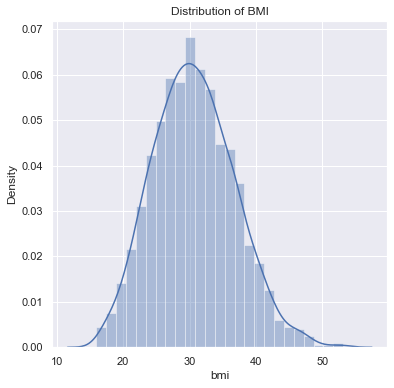

In [10]:
# Distribution of BMI
plt.figure(figsize=(6, 6))
sns.distplot(insurance_dataset['bmi'])
plt.title('Distribution of BMI')
plt.show()

#### Normal BMI range for a person: 18.5 to 24.9

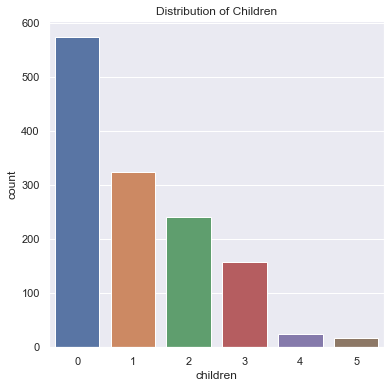

In [11]:
# Children column
plt.figure(figsize=(6, 6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Distribution of Children')
plt.show()

In [12]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

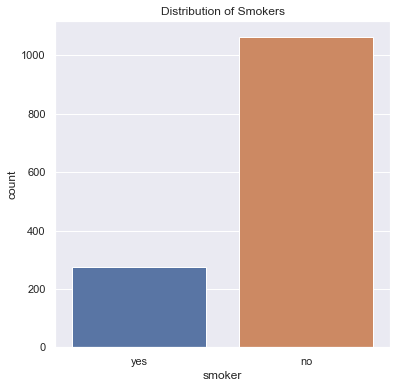

In [13]:
# Smoker column
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Distribution of Smokers')
plt.show()

In [14]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

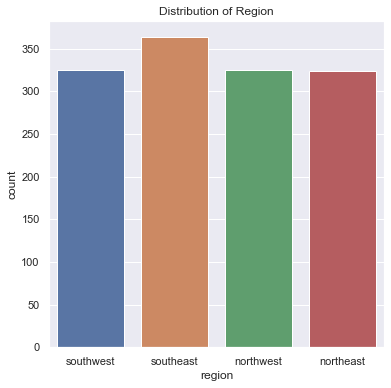

In [15]:
# Region Column
plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Distribution of Region')
plt.show()

In [16]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


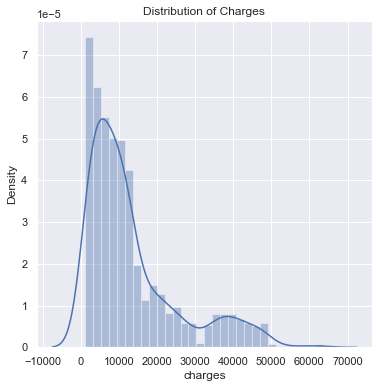

In [17]:
# Distribution of Charges
plt.figure(figsize=(6, 6))
sns.distplot(insurance_dataset['charges'])
plt.title('Distribution of Charges')
plt.show()

## Data Preprocessing

### Encoding Categorical features

In [18]:
# Encoding sex column
insurance_dataset.replace({'sex': {
	'male': 0,
	'female': 1
}}, inplace=True)

# Encoding Smoker column
insurance_dataset.replace({'smoker': {
	'yes': 0,
	'no': 1
}}, inplace=True)

# Encoding the Region column
insurance_dataset.replace({'region': {
	'southeast': 0,
	'southwest': 1,
	'northeast': 2,
	'northwest': 3,
}}, inplace=True)

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Dependent and Independent Variables

In [19]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [20]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [21]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Splitting the data into Training data and Testing data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
print("X: ", X.shape, x_train.shape, x_test.shape)
print("Y: ", Y.shape, y_train.shape, y_test.shape)

X:  (1338, 6) (1070, 6) (268, 6)
Y:  (1338,) (1070,) (268,)


## Model Training

In [24]:
# Linear Regression Model
model = LinearRegression()

In [25]:
model.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [26]:
# Prediction on training data
training_data = model.predict(x_train)
training_data

array([  478.49404197,  9317.75369733, 13193.79859142, ...,
       17327.55442479,  9600.51860822, 13753.18970971])

In [27]:
# R^2 value
r2_train = metrics.r2_score(y_train, training_data)
r2_train

0.751505643411174

In [28]:
# Prediction on test data
testing_data = model.predict(x_test)

In [29]:
r2_test = metrics.r2_score(y_test, testing_data)
r2_test

0.7447273869684077

## Building a Predictive System

In [30]:
input_data = (31, 1, 25.74, 0, 1, 0)

# Convert input data to a numpy array
input_data_array = np.asarray(input_data)

# Reshape the input data array
input_data_array = input_data_array.reshape(1, -1)

prediction = model.predict(input_data_array)
# prediction

print('The Insurance cost is $', prediction[0])

The Insurance cost is $ 3760.0805764960587


C:\Users\Siddarth\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Saving the Model

In [31]:
import pickle

filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Loading the saved Model

In [32]:
loaded_model = pickle.load(open(filename, 'rb'))

In [33]:
input_data = (31, 1, 25.74, 0, 1, 0)

# Convert input data to a numpy array
input_data_array = np.asarray(input_data)

# Reshape the input data array
input_data_array = input_data_array.reshape(1, -1)

prediction_l = loaded_model.predict(input_data_array)
# prediction

print('The Insurance cost is $', prediction_l[0])

The Insurance cost is $ 3760.0805764960587


C:\Users\Siddarth\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
